## Business Understanding
Business Understanding
Overview
Customer Churn is one of the most important and challenging problems for businesses such as Credit Card companies, cable service providers, SASS and telecommunication companies worldwide.

What is a Customer churn?

Customer churn can be used to define customers who:

Have completely stopped interacting or unsubscribed from a brand, or
Customers who have reduced how often they interact with your brand.
Customer churn is a metric used to gain insights into the Cust

## Data Understanding

We will use the SyriaTel dataset available on Kaggle (https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). The goal is to "build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company".

In [360]:
# Basic data manipultion and analysis
import numpy as np
import pandas as pd

# Data visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier

# Handling Class imbalance
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


# To ensure a more organized and tidy output, we suppress potential warnings that may arise during the execution of the code.
import warnings
warnings.filterwarnings('ignore')


In [361]:
data = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [362]:
# Function to print the shape of the DataFrame
def data_shape(data):
    print("Data Shape:")
    print(f"Number of Rows: {data.shape[0]}")
    print(f"Number of Columns: {data.shape[1]}\n")

# Function to display information about the data
def data_info(data):
    print("Data Information:")
    print(data.info())

# Function to check for missing values
def data_missing(data):
    print("\nMissing Values:")
    print(data.isnull().sum())
# Function to identify and display duplicate rows
def identify_duplicates(data):
    duplicates = data[data.duplicated()]
    print("\nDuplicate Rows:")
    print(duplicates)
# Function to display descriptive statistics of numerical columns
def data_describe(data):
    print("\nDescriptive Statistics:")
    print(data.describe())

In [363]:
# Function to explore the dataset
def explore_dataset(data):
    data_shape(data)
    data_info(data)
    data_missing(data)
    identify_duplicates(data)
    data_describe(data)

In [364]:
# Call the fuction to explore the dataset
explore_dataset(data)

Data Shape:
Number of Rows: 3333
Number of Columns: 21

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes

## Data cleaning

In [365]:
# Define a fuction to calculate the percentage of duplicates in each column of our dataset
def calculate_missing_percentage(data):
    # Calculate the total number of records
    total_records = len(data)

    # Check for missing values and calculate the percentage for each column
    missing_count = data.isnull().sum()
    missing_percentage = (missing_count / total_records) * 100

    # Create a DataFrame to store the missing values and percentages
    missing_data_df = pd.DataFrame({
        'Missing Values': missing_count,
        'Percentage (%)': missing_percentage
    })

    # Sort the DataFrame in ascending order based on the percentage of missing values
    missing_data_df = missing_data_df[missing_data_df['Missing Values'] > 0]
    missing_data_df.sort_values(by='Percentage (%)', ascending=True, inplace=True)

    return missing_data_df

# Assuming your dataset is named 'heart_data'
# Call the function to calculate missing percentages
missing_data_df = calculate_missing_percentage(data)

# Display the DataFrame with missing values and percentages
print(missing_data_df)

Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []


In [366]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


Note: Considering the min and max values, we see the values are of different scales, so we can consider scaling.

## Data preparation
There are no missing values / duplicates/outliers. We can proceed to EDA

## Data Cleaning

In [367]:
data.rename(columns=
    {
        "Int'l plan": "international plan",
        "VMail Plan": "voicemail plan",
        "number vmail messages": "voicemail messages",
        "total eve minutes": "total evening mins",
        "total eve calls": "total evening calls",
        "total eve charge": "total evening charge",
        "total intl minutes": "total international minutes",
        "total intl calls": "total international calls",
        "total intl charge": "total international charge",
    },
         inplace=True)
data

,state,account length,area code,phone number,international plan,voice mail plan,voicemail messages,total day minutes,total day calls,total day charge,...,total evening calls,total evening charge,total night minutes,total night calls,total night charge,total international minutes,total international calls,total international charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


## Exploratory Data Analysis


## Univariate Analysis: Exploring Target Variable

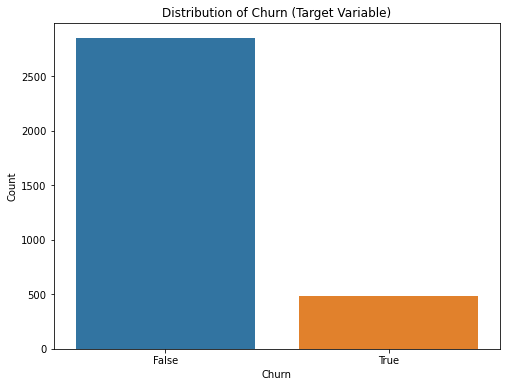

In [368]:
#Plot the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='churn', data=data)
plt.title('Distribution of Churn (Target Variable)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [369]:
class_distribution = data['churn'].value_counts()
print(class_distribution)

False    2850
True      483
Name: churn, dtype: int64


In [370]:
class_distribution = data['churn'].value_counts(normalize = True)
print(class_distribution)

False    0.855086
True     0.144914
Name: churn, dtype: float64


In [371]:
df1 = data.copy()
df1

,state,account length,area code,phone number,international plan,voice mail plan,voicemail messages,total day minutes,total day calls,total day charge,...,total evening calls,total evening charge,total night minutes,total night calls,total night charge,total international minutes,total international calls,total international charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [372]:

columns_to_drop = ['phone number', 'voice mail plan', 'voicemail messages']
df1.drop(columns=columns_to_drop, inplace=True,axis=1)
df1

,state,account length,area code,international plan,total day minutes,total day calls,total day charge,total evening mins,total evening calls,total evening charge,total night minutes,total night calls,total night charge,total international minutes,total international calls,total international charge,customer service calls,churn
0,KS,128,415,no,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,no,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,no,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,yes,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [373]:
df1

,state,account length,area code,international plan,total day minutes,total day calls,total day charge,total evening mins,total evening calls,total evening charge,total night minutes,total night calls,total night charge,total international minutes,total international calls,total international charge,customer service calls,churn
0,KS,128,415,no,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,no,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,no,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,yes,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


## Bivariate Analysis

total day charge versus churn

In [374]:
#print('Maximum number of charge :'df1['Total day charge'].max())
#print('Minimum number of charge :'df1['Total day charge'].min())
#print('Mean number of charge :'df1['Total day charge'].mean())
print("Maximum day charge:" , df1['total day charge'].max())

print("Manimum day charge:" , df1['total day charge'].min())
print("Average day charge:" , df1['total day charge'].mean())

Maximum day charge: 59.64
Manimum day charge: 0.0
Average day charge: 30.562307230723075


average day chrge is 30

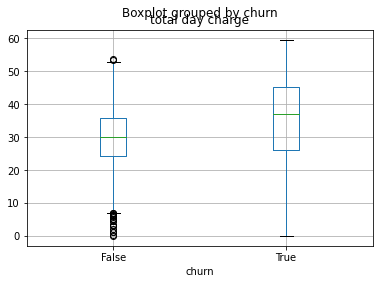

In [375]:
# plotting a boxplot to visualize total day charge by churn
df1.boxplot(column = 'total day charge', by = 'churn')
plt.show()

In [376]:
print("Maximum day calls:" , df1['total day calls'].max())

print("Manimum day calls:" , df1['total day calls'].min())
print("Average day calls:" , df1['total day calls'].mean())

Maximum day calls: 165
Manimum day calls: 0
Average day calls: 100.43564356435644


The non churn customers have a median of 100 calls. The median for the churn customers is slightly higher. 
Customers who are likely to churn on average make more calls.

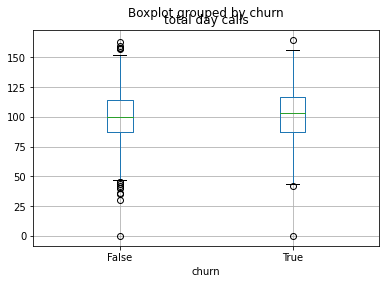

In [377]:
# plotting a boxplot to visualize total day calls by churn
df1.boxplot(column = 'total day calls', by = 'churn')
plt.show()

In [378]:
print("Maximum day minutes:" , df1['total day minutes'].max())

print("Manimum day minutes:" , df1['total day minutes'].min())
print("Average day minutes:" , df1['total day minutes'].mean())

Maximum day minutes: 350.8
Manimum day minutes: 0.0
Average day minutes: 179.77509750975094


average day minutes is 179

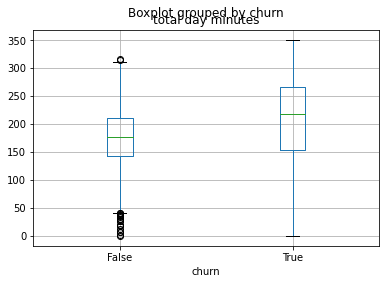

In [379]:
df1.boxplot(column = 'total day minutes', by = 'churn')
plt.show()

  Median for churn is higher than those who have not churned.

Hence customers who are likely to churn make more minutes on average.

The median for the churn customers is significantly higher than those in the non-churn class. This suggest that customers who are likely to churn are the customers who spend more minutes on the netweork.

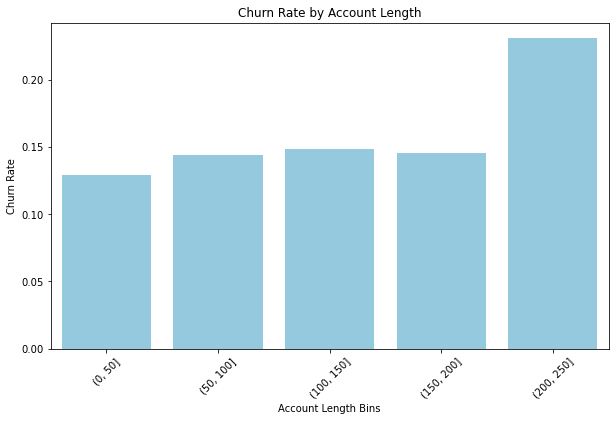

In [380]:
# Create bins for account length
bins = [0, 50, 100, 150 ,200,250]

# Create a new column for account length bins
df1['account_length_bin'] = pd.cut(df1['account length'], bins=bins)

# Calculate the churn rate for each account length bin
churn_rate_by_length = df1.groupby('account_length_bin')['churn'].mean()

# Plot the churn rate
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_length.index, y=churn_rate_by_length.values, color='skyblue')
plt.title('Churn Rate by Account Length')
plt.xlabel('Account Length Bins')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

The Churn rate for customers with account length between 0 - 200 days is relatively stable. Customers with account length exceeding 200 days are likely to churn.

In [381]:
print("Account length max is:" , df1['account length'].max())

print("Account length min is:" , df1['account length'].min())
print("Account length mean is:" , df1['account length'].mean())

Account length max is: 243
Account length min is: 1
Account length mean is: 101.06480648064806


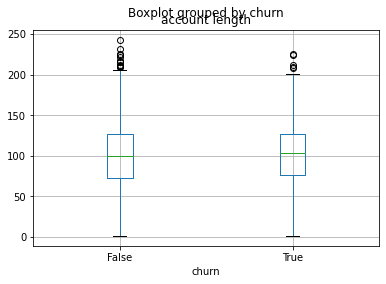

In [382]:
# plotting a boxplot to visualize total day charge by churn
df1.boxplot(column = 'account length', by = 'churn')
plt.show()

In [383]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   state                        3333 non-null   object  
 1   account length               3333 non-null   int64   
 2   area code                    3333 non-null   int64   
 3   international plan           3333 non-null   object  
 4   total day minutes            3333 non-null   float64 
 5   total day calls              3333 non-null   int64   
 6   total day charge             3333 non-null   float64 
 7   total evening mins           3333 non-null   float64 
 8   total evening calls          3333 non-null   int64   
 9   total evening charge         3333 non-null   float64 
 10  total night minutes          3333 non-null   float64 
 11  total night calls            3333 non-null   int64   
 12  total night charge           3333 non-null   float64 
 13  tot

## Bivariate analysis

In [384]:
# Correlation matrix
#correlation_matrix = df1[numerical_columns].corr()

# Plotting the correlation heatmap
#plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
#plt.title('Correlation Heatmap')
#plt.show()



Correlation Heatmap:

    Purpose: The correlation heatmap displays the pairwise correlation coefficients between numerical variables.
    Rationale: Identifying correlations is crucial in feature selection and model building. Highly correlated variables may introduce multicollinearity issues, affecting the model's stability and interpretability.




Pairplot

This provides scatterplots between all numerical variables in a dataset


In [385]:
# Plotting pairplot
#sns.pairplot(df1[numerical_columns])
#plt.show()

Multivariate analysis

In [386]:
#scatterplot matrix
# Plotting scatterplot matrix
#sns.pairplot(df1[numerical_columns], diag_kind='kde')
#plt.show()



Scatterplot Matrix:

    Purpose: The scatterplot matrix provides a more detailed view of relationships between pairs of numerical variables.
    Rationale: This plot helps confirm or further investigate correlations and interactions between numerical features. It is useful in understanding how multiple variables interact simultaneously.



Dealing with class imbalance

Examining the distribution of variables is crucial to check for class imbalances or data quality issues.

In [387]:
df1['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

When you have a severe class imbalance, such as the one above, you can consider using a combination of oversampling the minority class and undersampling the majority class to achieve a more balanced dataset.

In [388]:
X = df1.drop(['churn'],axis = 1)
y = df1['churn']
X

,state,account length,area code,international plan,total day minutes,total day calls,total day charge,total evening mins,total evening calls,total evening charge,total night minutes,total night calls,total night charge,total international minutes,total international calls,total international charge,customer service calls,account_length_bin
0,KS,128,415,no,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,"(100, 150]"
1,OH,107,415,no,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,"(100, 150]"
2,NJ,137,415,no,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,"(100, 150]"
3,OH,84,408,yes,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,"(50, 100]"
4,OK,75,415,yes,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,"(50, 100]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,"(150, 200]"
3329,WV,68,415,no,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,"(50, 100]"
3330,RI,28,510,no,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,"(0, 50]"
3331,CT,184,510,yes,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,"(150, 200]"
